그러나 너희는 택하신 족속이요 왕 같은 제사장들이요 거룩한 나라요 그의 소유가 된 백성이니 이는 너희를 어두운 데서 불러 내어 그의 기이한 빛에 들어가게 하신 이의 아름다운 덕을 선포하게 하려 하심이라 (벧전2:9)

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University


# 선형 회귀를 위한 뉴론 만들기

:본 단원은 참고문헌 (3)에서 대부분 발췌한 것입니다. 

--------------
지금가지 만들어 본 경사 하강법 알고리즘을 Neuron이라는 이름의 파이썬 클래스를 만들어 봅니다. 여기서 만드는 Neuron 클래스를 다양하게 확장하며 계속해서 활용할 예정입니다.  

## 1. Neuron 클래스 만들기

클래스 이름을 선언하고 `__init()__` 생성자 메소드를 정의합니다  

- 클래스 이름은 영어 대문자로 시작하는 것이 관례입니다. 
- 클래스 안에 정의된 함수는 메소드라고 부릅니다. 
- 클래스 메소드는 `거의 항상`  self를 첫 번째 인자로 합니다.  
- 클래스 메소드들 중에 앞뒤로 `__`가 있는 메소드는 매직(Magic) 메소드라고 부르며, 자동으로 호출됩니다.    

- `__init__()` 메소드는 클래스의 객체를 만들 때 자동으로 호출된다고 하여 생성자(Constructor)라고 부릅니다.
- `__init__()` 메소드에 정의되어 있는 변수들을 인스턴스 변수라고 하며, 객체의 자료를 저장하고 유지합니다. 
- `__init__()` 메소드에서 인스턴스 변수들을 초기화합니다. 

In [2]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0

In [4]:
neuron = Neuron()
print(neuron.w)

1.0


간단하게 시작할 수 있습니다. 학습할 때 가중치 $w$와 편향 $b$은 시작값이 있어야 하므로 임의로 1.0으로 설정하였습니다. 

## 2. 순전파(forpass) 메소드 만들기

뉴론의 입력된 신호가 $\hat{y}$을 구하는 방향으로 진행하면 연산하는 과정을 순전파(정방향)라고 이름하였습니다. 지금까지의 모델은 일차 함수였으므로 forpass()메소드도 일차함수를 통해 예측값을 계산합니다. 가중치와 편향은 인스탄스(instance) 변수 $w$와 $b$에 저장되어 있는 값을 사용합니다. 

In [5]:
def forpass(self, x):
    y_hat = self.w * x + self.b;
    return y_hat

위 메소드를 그림으로 표시하면 다음과 같습니다. 뉴론은 동그라미로, 3개의 입력 신호 $(w, b, x)$는 왼쪽 화살표에, 결과 신호는 오른쪽 화살표에 표시했습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-neuron1.png?raw=true" width="400">
<center>그림 1: 순방향 뉴론의 계산 </center>

$w, x, b$가 뉴론의 왼쪽에서 오른쪽 방향으로 흘러 $\hat{y}$가 됩니다. 그래서, 순방향 계산이라는 용어를 사용하였고, 이 계산도 앞에서 한 것과 같습니다. 앞으로 순방향으로 계산을 한다고 하면, $\hat{y}$을 구한다고 생각하면 됩니다. 순방향 계산을 정리하면 다음과 같습니다. 단순한 수식이니 꼭 기억하고 넘어가기 바랍니다. 

## 3. 역방향 메소드 만들기

$\hat{y}$을 계산하여 $y$와의 오차를 계산하고, 오차를 이용해 $w$와 $b$의 그레디언트를 계산했던 기억을 하나요? 




\begin{align}
\frac{\partial{L}}{\partial{w}} &= - (y - \hat{y}) x  \\
\frac{\partial{L}}{\partial{b}} &= - (y - \hat{y}) \tag{1}
\end{align}

각각의 그래디언트가 뉴론에서 어떤 역할을 했는지 그림으로 표현해 보았습니다. 그러면, 역방향(backpropagraion) 계산이라는 말도 잘 이해가 될 것입니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-neuron2.png?raw=true" width="400">
<center>그림 2: 역방향 뉴론의 계산 </center>

그림을 보면, 순방향 계산을 통해 얻어낸 $\hat{y}$과 $y$의 차이, 즉 오차가 뉴론의 오른쪽 방향에서 왼쪽 방향으로 흐르는 것처럼 보입니다. 그래서, 역방향 계산이라고 부릅니다. 즉, 오차의 역전파(backpropagration)이 됩니다. 그러면, 역방향 계산도 메소드로 아래와 같이 구현합니다. 

In [6]:
def backprop(self, x, error): 
    w_grad = x * error
    b_grad = 1 * error
    return w_grad, b_grad

앞에서 편미분을 통해 얻었던 수식을 그대로 코드로 옮기면 됩니다. 즉, 가중치의 그래디언트는 $x$와 오차(error)를 곱하고 편향의 그래디언트는 1과 오차(error)를 곱하면 됩니다.  이 후, 이 값들로 가중치와 편향을 반복해서 조정해 나가면, 점차 훈련 데이터에 최적화된 (손실 함수가 가장 작은 값인) 가중치와 편향을 얻을 것입니다. 

## 4. 지금까지의 Neuron 클래스 코드

다음은 지금까지 작성한 Neuron 클래스입니다. 코드는 간단하지만 기계학습과 딥러닝이 사용하는 경사 하강법 알고리즘의 핵심이 담겨져 있습니다. 딥러닝은 이렇게 간단한 연산의 조합으로 이루어져 있습니다. 

In [7]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0

    def forpass(self, x):
        y_hat = self.w * x + self.b;
        return y_hat

    def backprop(self, x, error): 
        w_grad = x * error
        b_grad = 1 * error
        return w_grad, b_grad
    

지금까지 과정을 조합하여 훈련 데이터를 가중치와 편향을 조정할 수 있도록 fit()메소드를 구현하겠습니다. 바로 이 과정이 훈련이고, 학습 과정입니다. 이 메소드는 오차 역전파를 학습하여 for문으로 구현했던 코드와 매우 비슷합니다. 

## 5. 훈련을 위한 fit() 메소드 구현하기

우선 fit() 메소드의 구조를 간단히 살펴보겠습니다. 

1. 처음에는 forpass() 메소드를 호출하여 $\hat{y}$을 구합니다. 
1. 그런 다음 오차(err)를 계산하고, 
1. 그 오차로 backprop() 메소드를 호출하여 가중치와 편향에 대한 그래디언트를 구합니다. 
1. 마지막으로 그래디언트를 가중치와 편향에서 빼면 가중치와 편향의 조정이 끝납니다. 

```
        y_hat = self.forpass(x_i)                  # 순전파 계산
        error = y_i - y_hat                        # 오차 계산
        w_grad, b_grad = self.backprop(x_i, error) # 역방향 계산
        self.w += w_grad                           # 가중치 조정
        self.b += b_grad                           # 편향 조정
```

- 이 과정을 모든 훈련 샘플에 대해 수행하고(one epoch), 
- 적절한 가중치와 편향이 구해질만큼 반복(epochs=100)하면 됩니다. 

```
    for i in range(epochs):                            # epoch만큼 반복합니다. 
        for x_i, y_i in zip(x, y):                     # 모든 샘플에 대해 반복합니다.
```

In [8]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0

    def forpass(self, x):
        y_hat = x * self.w + self.b 
        return y_hat

    def backprop(self, x, error): 
        w_grad = x * error
        b_grad = 1 * error
        return w_grad, b_grad

    def fit(self, x, y, epochs = 100): 
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                error = (y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, error)
                self.w += w_grad
                self.b += b_grad

## 6. 모델 훈련하기(학습시키기)

이제 실제로 모델을 만들고 훈련(학습)시켜 보도록 하겠습니다.  Neuron클래스의 객체 neuron을 생성하고 fit() 메소드에 입력 데이터($x$)와 타깃 데이터($y$)를 전달하면 됩니다. 

In [9]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

x = diabetes.data[:, 2]
y = diabetes.target

In [11]:
neuron = Neuron()
neuron.fit(x, y)

print(neuron.w, neuron.b)

913.5973364345905 123.39414383177204


## 7. 학습이 완료된 모델의 가중치와 편향을 확인하기

학습이 완료된 가중치와 편향은 neuron.w와 neuron.b에 저장되어 있습니다. 이 값을 이용하여 산점도 위에 직선 그래프롤 그려보도록 하겠습니다.  

산점도 위에 직선을 그리기 위해서, 최소한 두 점의 (x, y)값을 알아야 합니다. 임의로 두 개의 x값은 어디로 정하면 될까요? x값들 중에 min, max를 찾고, 약간의 margin을 더하거나 감하면 될 것입니다. 그러한 min, max에 따른 예측값 즉 y값은 neuron.w와 neuron.b를 통해서 구할 수 있습니다. 두 점의 x, y를 구하고, 이를 연결하면 직선이 됩니다.

#### Example: 직선을 그리기 위한 좌표 구하기

- linex : 두 점의 x 좌표 구하기
- liney : 두 점의 x 좌표에 대한 y값 즉 예측값 구하기

In [12]:
delta = (max(x) - min(x))/10
min_x, max_x = min(x) - delta, max(x) + delta
linex = [min_x, max_x]
liney = [min_x * neuron.w + neuron.b, max_x * neuron.w + neuron.b]

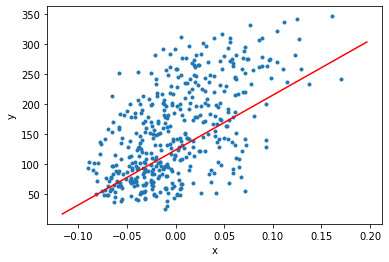

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x, y, marker='.')
plt.plot(linex, liney, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 축하합니다^^.

여러분은 경사 하강법을 적용한 뉴론을 구현했습니다. 신경망 모델을 사용하는 딥러닝은 항상 경사 하강법 알고리즘을 사용하므로, 경사 하강법 알고리즘이 딥러닝의 핵심 요소 중 하나라고 할 수 있습니다. 앞으로 Neuron 클래스를 기반으로 더 복잡한 딥러닝 알고리즘을 만들 것입니다.  

## 참고문헌

1. 케라스 창시자에게 배우는 딥러닝, 프랑소와 숄레, 길벗
1. 핸즈온 머신러닝, 오렐리앙 제롱, 한빛미디어
1. 딥러닝 입문, 박해선, 이지스 퍼블리싱
1. 파이썬으로 배우는 기계학습, 김영섭, K-MOOC

-------
__Be joyful always!__ 1 Thes.5:16